In [2]:
import sys
sys.path.append('../ACALIB')
import acalib
import matplotlib.pyplot as plt

%matplotlib inline

/Users/mauricio/anaconda/envs/jupyter/lib/python3.5/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [3]:
c = acalib.Container()
c.load_fits('../bindata/fits/cubes/Orion.methanol.cbc.contsub.image.fits')
#c.load_fits('../bindata/fits/cubes/M100line.image.fits')

cube = c.primary

#Better results with threshold

rms = acalib.noise_level(cube)
cube = acalib.denoise(cube, threshold=rms)

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


In [4]:
#Creating Spectra Sketcher
import acalib.core as cr
spectra,slices= cr.spectra_sketch(cube.data,10000)

[slice(0, 26, None)]

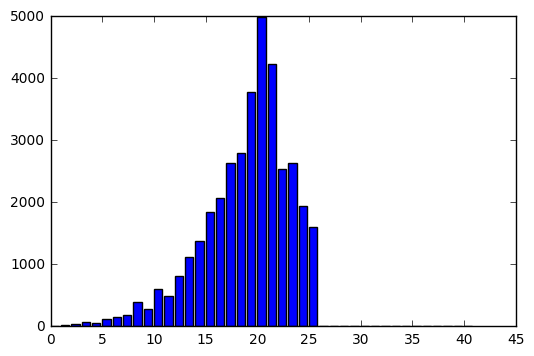

In [5]:

#Getting frecuencies
xs = cube.data.shape[1]
ys = cube.data.shape[2]
frecs_len = cube.data.shape[0]
frecs = range(frecs_len)

#Plotting spectra
plt.bar(frecs,spectra)
slices

In [6]:
idx=acalib.Indexing()
print(idx.config)
idx.config['PRECISION']=0.002
idx.config['SAMPLES']=100
cont=idx.run(cube)

{'RANDOM_STATE': None, 'SAMPLES': 1000, 'P': 0.05, 'PRECISION': 0.02}
pp
<class 'numpy.ndarray'>
lb
<class 'list'>


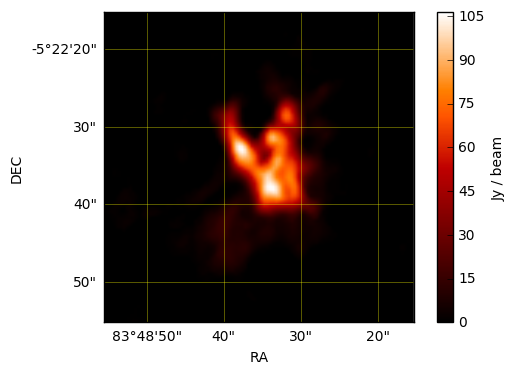

5


In [7]:
acalib.visualize(acalib.moment0(cont.primary))
print(len(cont.images))

1


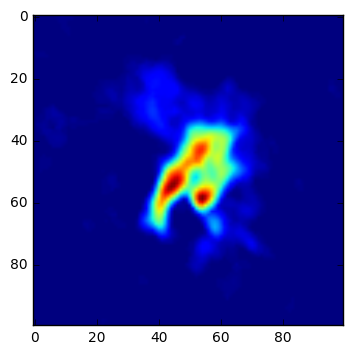

2


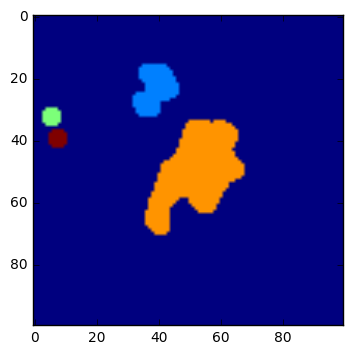

3


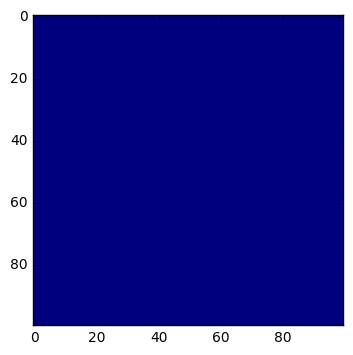

4


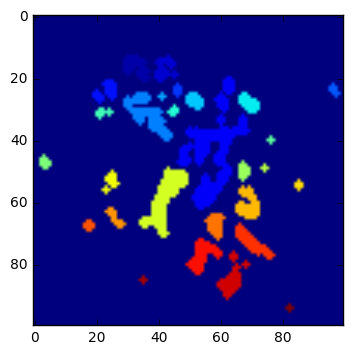

  CentroidRa   CentroidDec  MajorAxisLength ...  MinIntensity  AverageIntensity
------------- ------------- --------------- ... -------------- ----------------
23.6704545455 38.6988636364   18.9327506974 ...  3.68161761761    9.95519048382
         32.5           5.5   6.32455532034 ... 0.766435801983    1.87432158925
50.3042168675 51.8087349398   41.5332914657 ...  9.75901514292    44.3847108524
         39.5           7.5   6.32455532034 ... 0.729126811028    1.72149886191
16.5769230769 32.8269230769   10.9440555316 ... 0.725279569626    3.52675569287
17.1627906977  41.976744186   8.98021710472 ... 0.826171994209     5.9008137154
42.8566878981 57.5222929936   41.8110471073 ...  1.73232221603    42.1322066241
24.3888888889 23.1111111111   9.63626306041 ... 0.703705608845    2.04501399729
         24.0          46.0   4.51260859854 ...  6.28010797501    8.80769158493
         24.0 96.3636363636     4.967994363 ... 0.712125778198    1.04963870482
          ...           ...             

In [8]:
for i in range(1,len(cont.images)):
    print(i)
    plt.imshow(cont.images[i])
    plt.show()
for i in range(len(cont.tables)):
    print(cont.tables[i])

In [10]:
cont.tables[0]

CentroidRa,CentroidDec,MajorAxisLength,MinorAxisLength,Area,Eccentricity,Solidity,FilledPercentaje,MaxIntensity,MinIntensity,AverageIntensity
float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
23.6704545455,38.6988636364,18.9327506974,13.0836004139,176,0.722800743743,0.884422110553,1.0,15.7539578676,3.68161761761,9.95519048382
32.5,5.5,6.32455532034,6.32455532034,32,0.0,1.0,1.0,2.97653418779,0.766435801983,1.87432158925
50.3042168675,51.8087349398,41.5332914657,22.8505696225,664,0.835049524322,0.838383838384,1.0,89.8121794462,9.75901514292,44.3847108524
39.5,7.5,6.32455532034,6.32455532034,32,0.0,1.0,1.0,2.23230171204,0.729126811028,1.72149886191
16.5769230769,32.8269230769,10.9440555316,6.99174178984,52,0.769321309127,0.825396825397,1.0,10.4004702568,0.725279569626,3.52675569287
17.1627906977,41.976744186,8.98021710472,7.57242623583,43,0.537546346481,0.781818181818,1.0,12.119951725,0.826171994209,5.9008137154
42.8566878981,57.5222929936,41.8110471073,18.1222783299,314,0.901185899973,0.523333333333,1.0,89.8121794462,1.73232221603,42.1322066241
24.3888888889,23.1111111111,9.63626306041,6.29573358641,36,0.757066640603,0.8,1.0,3.77104234695,0.703705608845,2.04501399729
24.0,46.0,4.51260859854,2.9541957835,11,0.755928946018,1.0,1.0,11.1502418518,6.28010797501,8.80769158493
